In [1]:
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox
from tools.utils import *
from tools.accessibility import *
from tools.accessibility_fit import *

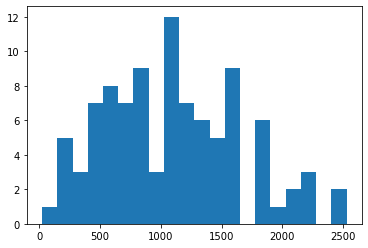

In [2]:
#travel times in minutes
np.random.seed(1)
d = np.random.normal(1000,700,100)
d = d[d>0]
plt.hist(d,bins=20)
plt.show()

First, let's see how the decay function is fitted to a survival curve. This is the most common case in recent times and is more mathematically stable

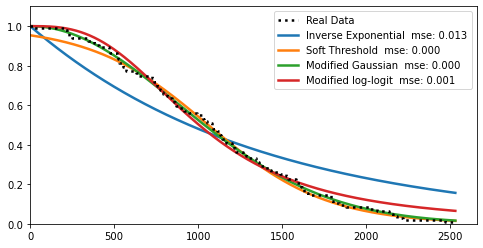

best function is: Modified Gaussian


In [3]:
best, all_funcs = get_best_fit_cdf(d)
print('best function is:',best[0])

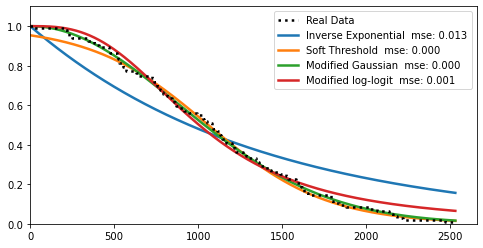

best function is: Modified Gaussian


In [4]:
best, all_funcs = get_best_fit_cdf(d)
print('best function is:',best[0])

# For Real Data

In [5]:
import pandas as pd
import geopandas as gpd

In [6]:
df = pd.read_csv('test_data/FloripaOD/Floripa.csv',sep=';',index_col=0)
df.head()

,Date,Main Mode,Modes,Motive origin,Motive dest,"Origin (Lat,Lon)","Dest (Lat,Lon)",Zone 1,Zone 2,Start [h],End [h],Duration [min],factor
ID,,,,,,,,,,,,,
704.0,NaN,walk,NaN,Home,Work,NaN,NaN,21001.0,21001.0,7.5,7.583333,5.0,21.301342
704.0,NaN,walk,NaN,Work,Home,NaN,NaN,21001.0,21001.0,18.0,18.166667,5.0,21.301342
705.0,NaN,walk,NaN,Home,Leisure,NaN,NaN,21001.0,21001.0,9.5,9.666667,10.0,21.301342
705.0,NaN,walk,NaN,Leisure,Home,NaN,NaN,21001.0,21001.0,11.0,11.166667,10.0,21.301342
706.0,NaN,bus,NaN,Home,Education,NaN,NaN,21001.0,21001.0,7.5,7.750000,15.0,19.355514


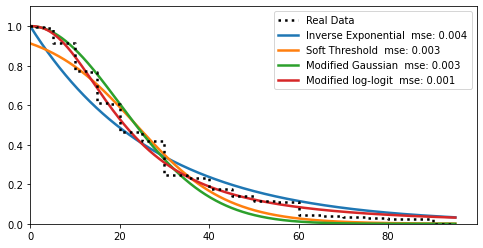

best function is: Modified log-logit


In [7]:
#the trip durations in minutes with no nans
d = df['Duration [min]'].dropna()
#fit it
best, all_funcs = get_best_fit_cdf(d)
print('best function is:',best[0])

### What happens in most travel behavior studies is that some trips represent more people than others, since the study must be done by sampling populations of different areas. This is represented by the multiplication "factor". We can consider this in our analysis:

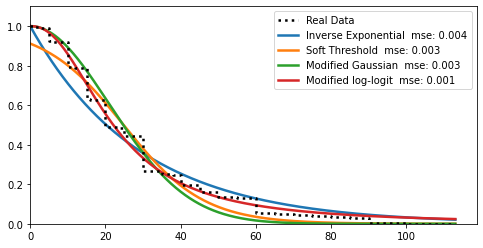

best function is: Modified log-logit


In [8]:
#the trip durations in minutes with no nans
df = df.dropna(subset=['Duration [min]','factor'])
#arrange somple by factor
d_fac = []
for i,row in df.iterrows():
    d_fac += [row['Duration [min]']]*round(row['factor'])
#fit it
best, all_funcs = get_best_fit_cdf(np.array(d_fac))
print('best function is:',best[0])

### And we can consider only one mode

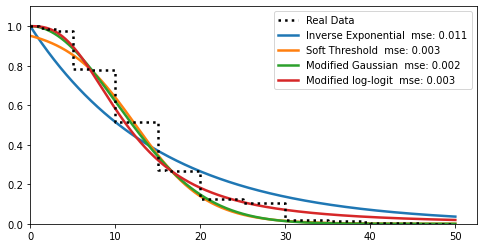

best function is: Modified Gaussian


In [9]:
#the trip durations in minutes with no nans
df = df.dropna(subset=['Duration [min]','factor'])
df = df[df['Main Mode']=='walk']
#arrange somple by factor
d_fac = []
for i,row in df.iterrows():
    d_fac += [row['Duration [min]']]*round(row['factor'])
#fit it
best, all_funcs = get_best_fit_cdf(np.array(d_fac))
print('best function is:',best[0])